![WMLE LOGOS](https://github.com/sanjayksau/wmle2024/blob/main/logo3.png?raw=true)

#Decision Tree Classifier Implementation
Implement a Decision Tree Classifier and visualize its decision boundaries

##Import Required Libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification

##Decision Tree Node Class

The Node class in a decision tree is designed to store information about a node in the tree, including the feature used for splitting, the threshold at which the split occurs, the left and right children (subtrees), and the predicted value if the node is a leaf.



In [22]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        # The feature used to split the data at this node.
        self.feature = feature
        #TODO: Initialize threshold, left, right, and the node value.
        # The threshold value for splitting on the feature.

        # The left child node (subtree) for values <= threshold.

        # The right child node (subtree) for values > threshold.

        # If the node is a leaf, this stores the predicted value (class).


##Decision Tree Class

---
The Decision Tree class contains several key methods:

Initialization: The constructor __init__ initializes the decision tree parameters.

min_samples: Minimum number of samples required to split a node.
max_depth: Maximum depth of the decision tree.
Entropy Calculation: Measures the impurity of a dataset. Lower entropy indicates a purer dataset.

Information Gain: Measures the effectiveness of a split. The split that results in the highest information gain is chosen.

Best Split: Finds the feature and threshold that results in the best split by iterating through all possible splits.

Tree Building: Recursively builds the decision tree by selecting the best splits until the depth or minimum samples criteria are met.

Prediction: After the tree is built, it can predict classes for new samples.

Decision Boundary Plotting: Visualizes how the decision tree splits the feature space.


Entropy of a system with $i$ classes with probability $p_i$ is given by

$$E = \sum_ip_ilog_2p_i$$

where $p_i$ represent the fraction of examples from a particular class.

$$Information~gain = parent Entropy - \sum Children Entropy$$


---



In [23]:
class DecisionTree:
    #Initialize the Decision Tree
    #min_samples: Determines when a node should stop splitting
    #max_depth: Limits the depth of the tree to prevent overfitting
    def __init__(self, min_samples=2, max_depth=2):
        #TODO: Assign min_samples and max_depth to self.min_samples and self.max_depth respectively

        self.root = None

    #Entropy: Measures the uncertainty in the labels
    def entropy(self, y):
        #TODO: Compute Entropy
        pass
    #Information Gain: Reduction in Entropy


    def information_gain(self, parent, left, right):
        p, l, r = len(parent), len(left), len(right)
        #TODO: Calculate the entropy of the parent, left and right child node


        #TODO: return information gain: Parent Entropy - Weighted entropy of Children



    #Split the Data on a specific feature and threshold
    def split_data(self, dataset, feature, threshold):

        left = dataset[dataset[:, feature] <= threshold]

        #TODO: Get the right split where the feature value is greater than the threshold

        return left, right

    #best_split: find the best feature and threshold
    def best_split(self, dataset):
        X, y = dataset[:, :-1], dataset[:, -1]  # Ensure y is integer
        best = {'gain': -1, 'feature': None, 'threshold': None, 'left': None, 'right': None}

        for feature in range(X.shape[1]):
            for threshold in np.unique(X[:, feature]):
                #TODO: Split the data based on the feature and threshold

                if len(left) > 0 and len(right) > 0:
                    gain = self.information_gain(y, left[:, -1], right[:, -1])  # Ensure y is integer
                    if gain > best['gain']:
                        #TODO: update 'best' with new improved information gain.


        return best

    #Build the Tree
    def build_tree(self, dataset, depth=0):
        X, y = dataset[:, :-1], dataset[:, -1]
        if len(dataset) >= self.min_samples and depth <= self.max_depth:
            best = self.best_split(dataset)
            if best['gain'] > 0:
                #TODO: Build left and right subtree recursively

                return Node(best['feature'], best['threshold'], left, right)

        # Return the leave node: most common class (make sure it's an int)
        return Node(value=np.bincount(y.astype(int)).argmax())

    #Fit the Model
    def fit(self, X, y):
        dataset = np.column_stack((X, y))
        #TODO: Build the Decision Tree


    def predict_sample(self, node, sample):
        if node.value is not None:
            return node.value
        elif sample[node.feature] <= node.threshold:
            return self.predict_sample(node.left, sample)
        else:
            return self.predict_sample(node.right, sample)

    #Predict Labels
    def predict(self, X):
        return np.array([self.predict_sample(self.root, sample) for sample in X], dtype=int)

    #Plot the decision Bounaries
    def plot_decision_boundary(self, X, y):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        # Create a grid of points
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))

        grid_points = np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(grid_points)  # Predict class for each point
        Z = Z.reshape(xx.shape)

        # Plotting decision boundaries
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'blue')))
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(('red', 'blue')), edgecolor='k')
        plt.title('Decision Tree Decision Boundaries')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

##Experiment with Data
###Decision Boundaries Plotting

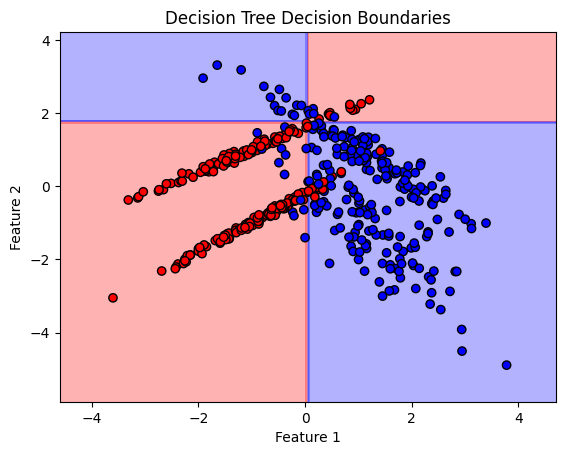

In [24]:
# Example usage
# Generate a toy dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                            n_redundant=0, n_clusters_per_class=2, random_state=42)

# Train DecisionTree and plot decision boundaries
tree = DecisionTree(min_samples=2, max_depth=1)
tree.fit(X, y)
tree.plot_decision_boundary(X, y)

##TODO

1. Modify the Decision Tree parameters: Change min_samples and max_depth to observe how they affect the model's performance.
2. Change the dataset: Use different parameters in make_classification to create a new dataset. (Modify number of samples/random_state
3. Experiment with different classification metrics: Implement accuracy, precision, and recall for model evaluation.